# Implementação do tutorial

Este notebook possui a implementação da visualização da esfera (seção 5 do [tutorial](https://raytracing.github.io/books/RayTracingInOneWeekend.html#addingasphere))

No caso, está sendo implementado duas versões

1- **Inicial**: a implementação não usa classes como Sphere, Camera, Hittable, etc. É literalmente o código até a seção 5, traduzido de C++ para Python

2- **final**: a implementação usa classes como Sphere, Camera, Hittable, etc. Esta implementação segue o tutorial até a seção 7.

## Importações

In [ ]:
import sys
import os

import numpy as np
from tqdm import tqdm

sys.path.append(os.path.abspath(os.path.join('../../..')))

from Atividade04.src.classes.Ray import Ray
from Atividade02.src.vectorized.Vec3 import Vec3, Point3, Color
from Atividade01.src.ImageIO import ImageWriter
from Atividade01.src.Image import Image

## Implementação inicial

In [1]:
import sys
import os

import numpy as np
from tqdm import tqdm

sys.path.append(os.path.abspath(os.path.join('../../..')))

from Atividade04.src.classes.Ray import Ray
from Atividade02.src.vectorized.Vec3 import Vec3, Point3, Color
from Atividade01.src.ImageIO import ImageWriter
from Atividade01.src.Image import Image

In [2]:
aspect_ratio = 16.0 / 9.0
image_width = 400

image_height = int(image_width / aspect_ratio)
if image_height < 1:
    image_height = 1

viewport_height = 2.0
viewport_width = viewport_height * (image_width / image_height)
# OBS: viewport_width: não está usando a variável aspect_ratio, pois a variável aspect_ratio é a proporção ideal da imagem, porém, arredondamos image_height para inteiro, podendo assim perder um pouco de precisão na proporção da imagem.

In [3]:
def ray_color(ray: Ray):
    unit_direction = ray.direction.unit_vector()
    a = 0.5 * (unit_direction.y + 1.0)
    return (1.0 - a) * Color([1.0, 1.0, 1.0]) + a * Color([0.5, 0.7, 1.0])

def raytrace_pipeline(filename: str):
    aspect_ratio = 16.0 / 9.0
    image_width = 400

    image_height = int(image_width / aspect_ratio)
    if image_height < 1:
        image_height = 1

    viewport_height = 2.0
    viewport_width = viewport_height * (image_width / image_height)
    
    focal_length = 1.0
    camera_center = Point3([0, 0, 0])

    viewport_u = Vec3([viewport_width, 0, 0])
    viewport_v = Vec3([0, -viewport_height, 0])

    pixel_delta_u = viewport_u / image_width
    pixel_delta_v = viewport_v / image_height

    # If pixels are spaced the same distance horizontally as they are vertically, the viewport that bounds them will have the same aspect ratio as the rendered image.
    # Como estamos definindo o viewport para ter o mesmo aspect ratio da imagem (quantidade de pixels), então, os pixels terão o mesmo espaçamento horizontal e vertical.

    viewport_upper_left = camera_center - Vec3([0, 0, focal_length]) - (viewport_u / 2) - (viewport_v / 2)
    pixel00_loc = viewport_upper_left + 0.5 * (pixel_delta_u + pixel_delta_v)
    # Precisa adicionar 0,5 da distancia de separação dos pixels. O canto esquerdo do viewport não é o mesmo que o ponto 0,0 da imagem. O viewport precisa ter uma borda de 0,5 espaçamento de pixel para cada lado.


    # CRIAR MATRIZ
    image = Image(image_width, image_height)
    for j in tqdm(range(image_height)):
        for i in range(image_width):
            pixel_center = pixel00_loc + (i * pixel_delta_u) + (j * pixel_delta_v)
            ray_direction = pixel_center - camera_center
            ray = Ray(camera_center, ray_direction)

            pixel_color = ray_color(ray)
            image[j, i] = pixel_color

    img_writer = ImageWriter(image)
    img_writer.save(filename)
    display(img_writer.image)

  0%|          | 0/225 [00:00<?, ?it/s]

100%|██████████| 225/225 [00:07<00:00, 29.86it/s]


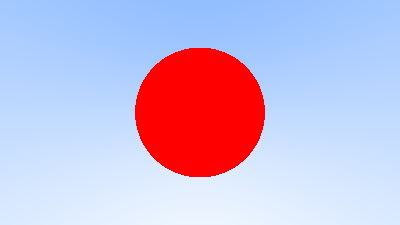

In [4]:
def hit_sphere(center: Point3, radius: float, ray: Ray):
    oc = ray.origin - center
    a = ray.direction.dot(ray.direction)
    b = 2 * oc.dot(ray.direction)
    c = oc.dot(oc) - radius ** 2

    discriminant = b ** 2 - 4 * a * c
    return discriminant >= 0

def ray_color(ray: Ray):
    # Se acertar a esfera, pinta de vermelho
    if hit_sphere(Point3([0, 0, -1]), 0.5, ray):
        return Color([1, 0, 0])
    
    # Se não, pinta com o fundo (degradê)
    unit_direction = ray.direction.unit_vector()
    a = 0.5 * (unit_direction.y + 1.0)
    return (1.0 - a) * Color([1.0, 1.0, 1.0]) + a * Color([0.5, 0.7, 1.0])

raytrace_pipeline('../imgs/initial-sphere.png')

## Implementação final